In [1]:
import pandas as pd
from pandas import json_normalize
from IPython.display import display

In [2]:
archivo = "TelecomX_Data.json"
df = pd.read_json(archivo)

In [3]:
columnas_complejas = [col for col in df.columns if df[col].apply(lambda x: isinstance(x, dict) or isinstance(x, list)).any()]
display(f"Columnas con diccionarios o listas: {columnas_complejas}")

for col in columnas_complejas:
    df_normalizado = json_normalize(df[col])
    df_normalizado.columns = [f"{col}_{subcol}" for subcol in df_normalizado.columns]
    df = df.drop(columns=[col]).join(df_normalizado)

"Columnas con diccionarios o listas: ['customer', 'phone', 'internet', 'account']"

In [4]:
df = df.drop_duplicates()

In [5]:
for col in df.select_dtypes(include='number').columns:
    df[col].fillna(df[col].median(), inplace=True)

/tmp/ipython-input-681661896.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].median(), inplace=True)


In [6]:
for col in df.select_dtypes(include='object').columns:
    df[col] = df[col].str.strip()  # quitar espacios
    df[col].fillna('Desconocido', inplace=True)
    df[col] = df[col].replace('', 'Desconocido')

/tmp/ipython-input-3369855520.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna('Desconocido', inplace=True)


In [7]:
if 'genero' in df.columns:
    df['genero'] = df['genero'].str.lower()
    df['genero'] = df['genero'].replace({'m': 'masculino', 'f': 'femenino'})

In [8]:
for col in df.columns:
    if 'fecha' in col.lower():
        df[col] = pd.to_datetime(df[col], errors='coerce').dt.normalize()

In [9]:
if 'edad' in df.columns:
    df.loc[df['edad'] < 0, 'edad'] = df['edad'].median()


In [41]:
df['Cuentas_Diarias'] = df['account_Charges.Monthly'] / 30


In [10]:
if 'facturacion_mensual' in df.columns:
    df['Cuentas_Diarias'] = df['facturacion_mensual'] / 30

In [11]:
df.rename(columns={
    'facturacion_mensual': 'FacturacionMensual',
    'edad': 'EdadCliente',
    'genero': 'GeneroCliente',
    'evasión': 'Evasion'
}, inplace=True)

In [12]:
if 'Evasion' in df.columns:
    df['Evasion_Binaria'] = df['Evasion'].replace({'Sí': 1, 'No': 0})

In [13]:
if 'Cuentas_Diarias' in df.columns:
    df['Cuentas_Diarias_Normalizadas'] = (df['Cuentas_Diarias'] - df['Cuentas_Diarias'].min()) / (df['Cuentas_Diarias'].max() - df['Cuentas_Diarias'].min())

In [24]:

df['account_Charges.Monthly'] = pd.to_numeric(df['account_Charges.Monthly'], errors='coerce')
df['account_Charges.Total']   = pd.to_numeric(df['account_Charges.Total'], errors='coerce')


In [15]:
display("Valores nulos por columna:")
df.isnull().sum()

'Valores nulos por columna:'

,0
customerID,0
Churn,0
customer_gender,0
customer_SeniorCitizen,0
customer_Partner,0
customer_Dependents,0
customer_tenure,0
phone_PhoneService,0
phone_MultipleLines,0
internet_InternetService,0


In [16]:
display("Tipos de datos finales:")
df.dtypes

'Tipos de datos finales:'

,0
customerID,object
Churn,object
customer_gender,object
customer_SeniorCitizen,int64
customer_Partner,object
customer_Dependents,object
customer_tenure,int64
phone_PhoneService,object
phone_MultipleLines,object
internet_InternetService,object


In [17]:
display("Primeras filas del dataset final:")
df.head()

'Primeras filas del dataset final:'

,customerID,Churn,customer_gender,customer_SeniorCitizen,customer_Partner,customer_Dependents,customer_tenure,phone_PhoneService,phone_MultipleLines,internet_InternetService,...,internet_OnlineBackup,internet_DeviceProtection,internet_TechSupport,internet_StreamingTV,internet_StreamingMovies,account_Contract,account_PaperlessBilling,account_PaymentMethod,account_Charges.Monthly,account_Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

# Configuración general
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (10,6)

In [20]:
# Estadísticas generales de columnas numéricas
df.describe()

,customer_SeniorCitizen,customer_tenure,account_Charges.Monthly
count,7267.000000,7267.000000,7267.000000
mean,0.162653,32.346498,64.720098
std,0.369074,24.571773,30.129572
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.425000
50%,0.000000,29.000000,70.300000
75%,0.000000,55.000000,89.875000
max,1.000000,72.000000,118.750000


In [26]:
df[['customer_tenure', 'account_Charges.Monthly', 'account_Charges.Total']].agg(['mean','median','std','min','max'])


,customer_tenure,account_Charges.Monthly,account_Charges.Total
mean,32.346498,64.720098,2279.287581
median,29.000000,70.300000,1391.000000
std,24.571773,30.129572,2267.178963
min,0.000000,18.250000,18.800000
max,72.000000,118.750000,8684.800000


In [30]:
df['Churn'].value_counts()

,count
Churn,
No,5174
Yes,1869
Desconocido,224


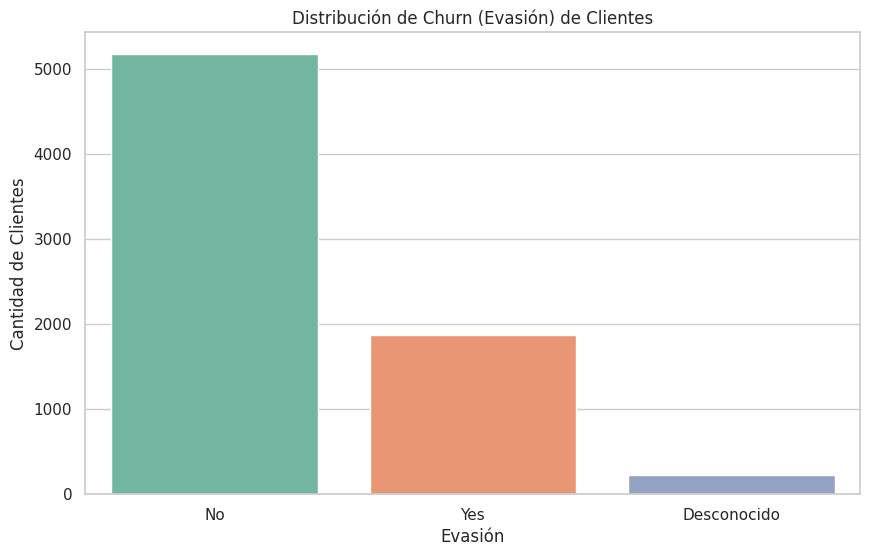

In [33]:
sns.countplot(data=df, x='Churn', hue='Churn', palette='Set2', legend=False)
plt.title('Distribución de Churn (Evasión) de Clientes')
plt.xlabel('Evasión')
plt.ylabel('Cantidad de Clientes')
plt.show()

Graficando: customer_gender


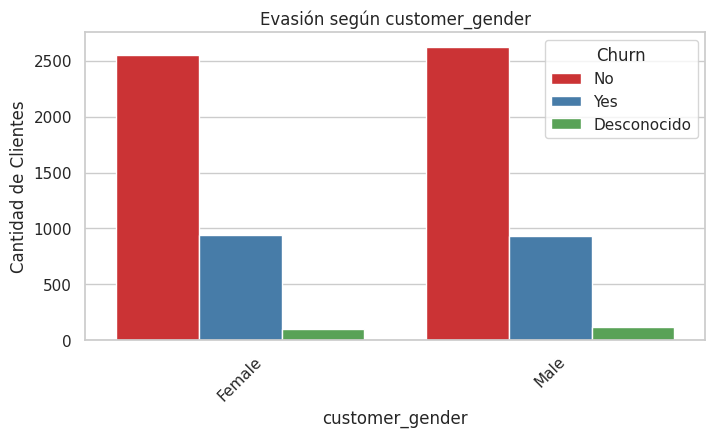

Graficando: account_Contract


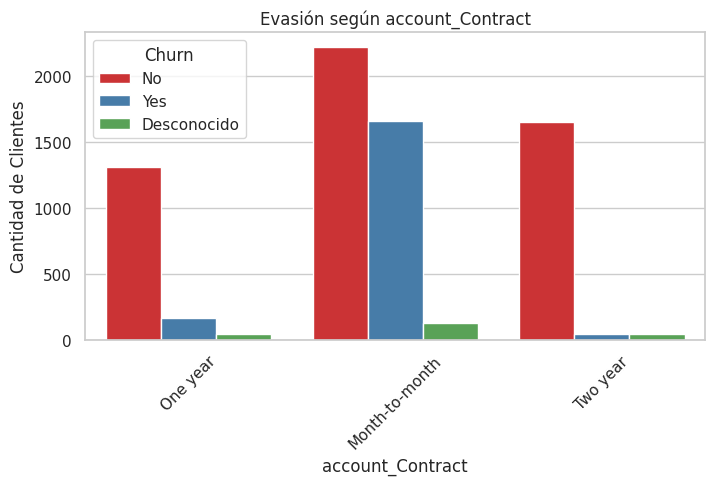

Graficando: account_PaymentMethod


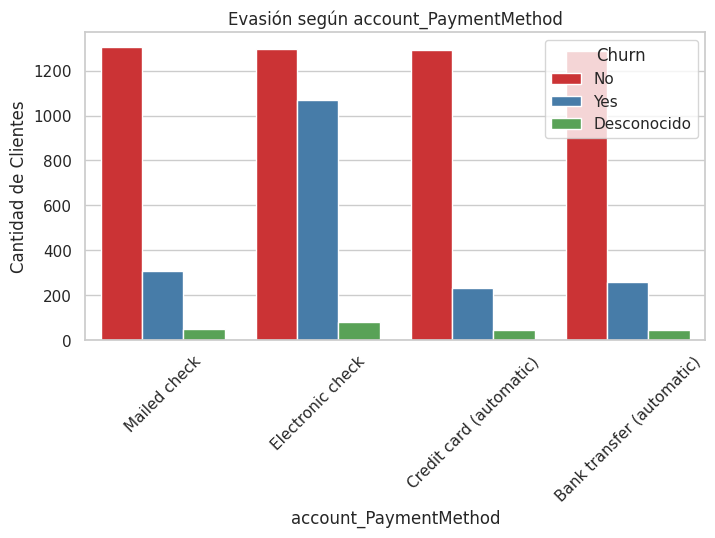

In [37]:
categoricas = ['customer_gender', 'account_Contract', 'account_PaymentMethod']

for col in categoricas:
    if col in df.columns:
        print(f"Graficando: {col}")
        plt.figure(figsize=(8,4))
        sns.countplot(data=df, x=col, hue='Churn', palette='Set1')
        plt.title(f'Evasión según {col}')
        plt.ylabel('Cantidad de Clientes')
        plt.xticks(rotation=45)
        plt.legend(title='Churn')
        plt.show()
    else:
        print(f"Columna no encontrada: {col}")


/tmp/ipython-input-1826258837.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Churn', y=col, palette='Set3')


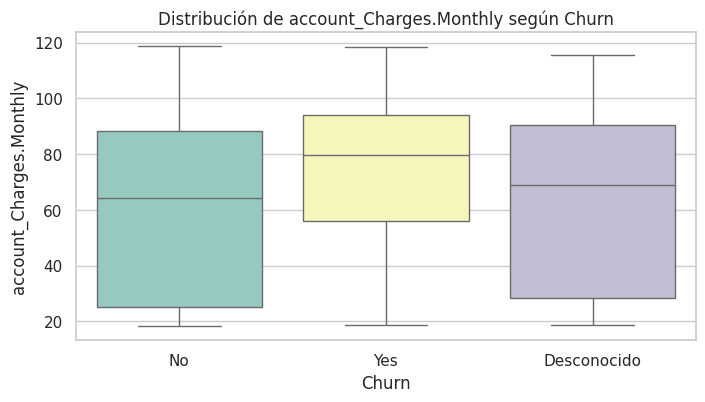

/tmp/ipython-input-1826258837.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Churn', y=col, palette='Set3')


Columna no encontrada: Cuentas_Diarias


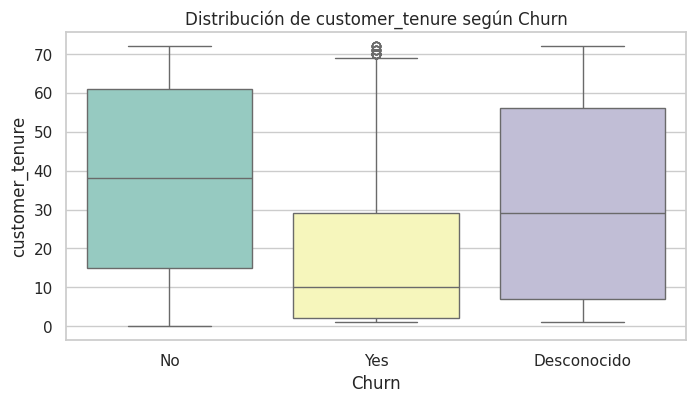

In [39]:
numericas = ['account_Charges.Monthly', 'Cuentas_Diarias', 'customer_tenure']

for col in numericas:
    if col in df.columns:
        plt.figure(figsize=(8,4))
        sns.boxplot(data=df, x='Churn', y=col, palette='Set3')
        plt.title(f'Distribución de {col} según Churn')
        plt.show()
    else:
        print(f"Columna no encontrada: {col}")


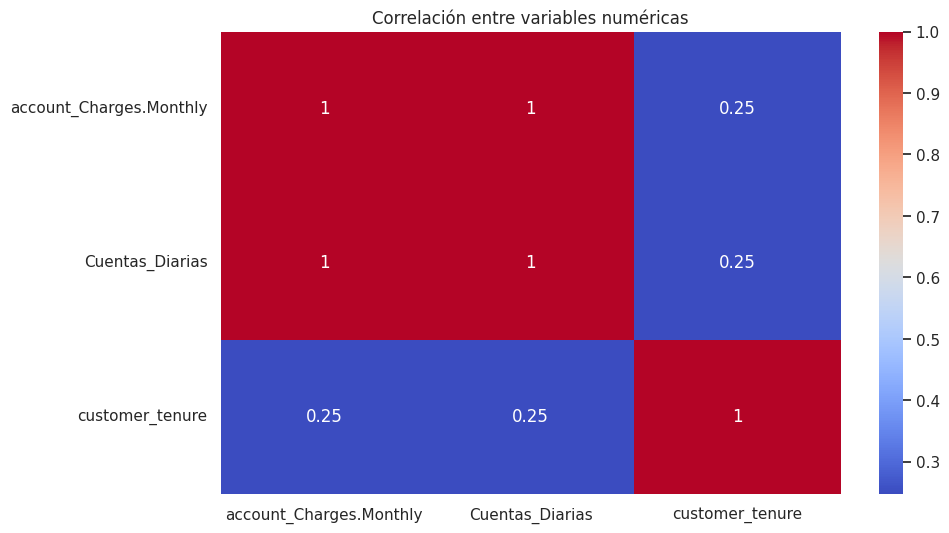

In [42]:
corr = df[numericas].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlación entre variables numéricas')
plt.show()


#Informe Final

El objetivo de este analisis es entender los factores que influyen en la evasión de clientes de Telecom X.

* Limpieza y tratamiento de Datos: Carga del JSON, normalización de columnas complejas, eliminación de duplicados, imputación de nulos, estandarización de categorías y creación de cuentas diarias.

* Análisis Exploratorio de Datos:
  - Estadísticas descriptivas.
  - Distribución de churn general.
  - Distribución de churn por variables categóricas (gráficos de barras).
  - Distribución de churn por variables numéricas (boxplots).
  - Correlaciones entre variables numéricas.
* Conclusiones e Insights:
  - Identificar perfiles de clientes con mayor riesgo de churn.
  - Analizar si ciertos planes, métodos de pago o edades están asociados con cancelaciones.
  - Detectar valores de facturación o tiempo de contrato relacionados con evasión.
* Recomendaciones:
  - Diseñar estrategias de retención basadas en los patrones encontrados (promociones, fidelización, atención personalizada).
  - Monitorear indicadores clave como facturación diaria y tiempo de contrato para anticipar riesgos.


